## CAS KAGGLE

#### Introducció

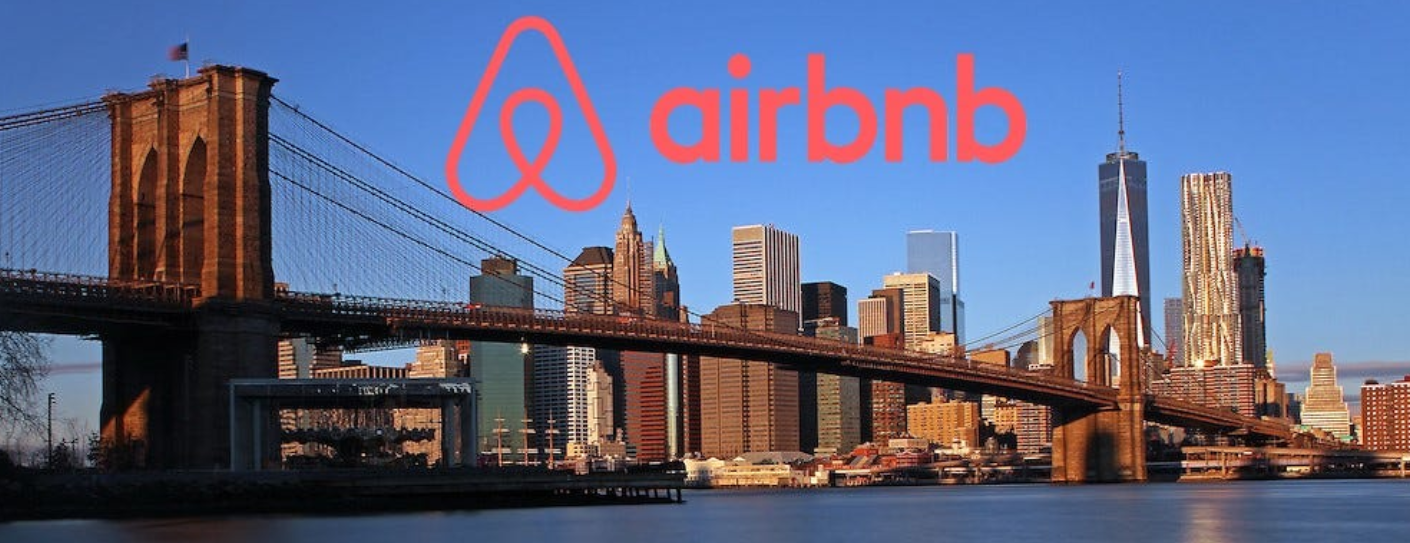

Des de 2008, els hostes i amfitrions han utilitzat Airbnb per ampliar les possibilitats de viatge i presentar una forma més única i personalitzada d'experimentar el món. Aquest conjunt de dades descriu l'activitat i les mètriques del llistat a NYC, NY per al 2019.

Aquest fitxer de dades inclou tota la informació necessària per saber més sobre els amfitrions, la disponibilitat geogràfica, les mètriques necessàries per fer prediccions i extreure conclusions.

El nostre cas kaggle, es tracta d'un problema de regressió, el target serà predir el preu per nit del AirBnb.

Guia 

1- introducció / llegir base de dades
2- data cleaning / preprocessament (tractar els nans, tractar els outliers)
3- Exploration data analisiy 

Primer de tot anem importar les llibreries que ens seràn necessaries. 



In [291]:
#importem llibreries
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

### 1. Exploratory Data Analysis  (EDA)

EDA s'utilitza principalment per a veure el que les dades poden revelar més enllà del modelatge formal o la tasca de prova d'hipòtesi i proporciona una millor comprensió de les variables del conjunt de dades i les relacions entre elles. A partir d'aquest anàl·lis podem extreure les primeres conclusions. 

##### Anàl·lisis descriptiu



Primer de tot llegim el dataset. És molt important veure les dades i examinar-les juntament amb els atributs del nostre dataset per entrendre-ls així serà més fàcil per preparar les dades per futurs anàl·lisis.  

In [292]:
df = pd.read_csv('dataset/AB_NYC_2019.csv')

print(f'El nombre de mostres son: {df.shape[0]}')
print(f"El nombre d'atributs son: {df.shape[1]}")

print(df.dtypes)

df.head




El nombre de mostres son: 48895
El nombre d'atributs son: 16
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


<bound method NDFrame.head of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

         

Com podem veur el nostre dataset té 48895 mostres, és a dir files. I després té 16 atributs. El target serà l'atribut price.

#### Descripció dels atributs: 
- id: identificador 
- name: nom de l'anunci
- host_id: id del host 
- neighbourhood_group: localització
- neighbourhood: barri 
- latitude: latitud
- longitude: longitud
- room_type: tipus d'apartament 
- price: preu en dolars (target)
- number_of_reviews: número de reviews
- last_review: data de l'ultima ressenya
- calculated_host_listings_count: número de apartamentos que tiene el anfitrion
- availability_365: número de dias que está disponible para reservar 



In [293]:
#realitzem un anàl·lisis descriptiu 
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

Podem veure que la mitjana de preus és de 152.74 $ per nit. La mitajana de número de nits és 7. També sorprén que la mínima 'availability_365' és de 0, és a dir que no hi ha disponibilitat en cap dia del any. 

Eliminem files on el preu sigui 0 i la disponibilitat sigui 0 també ja que no té sentit i podria fer que el rendiment del nostre model empitjores. Son molt poques files per tant, les eliminem. 

In [294]:
df = df[(df['price'] != 0) | (df['availability_365'] != 0)]
df.shape

(48892, 16)

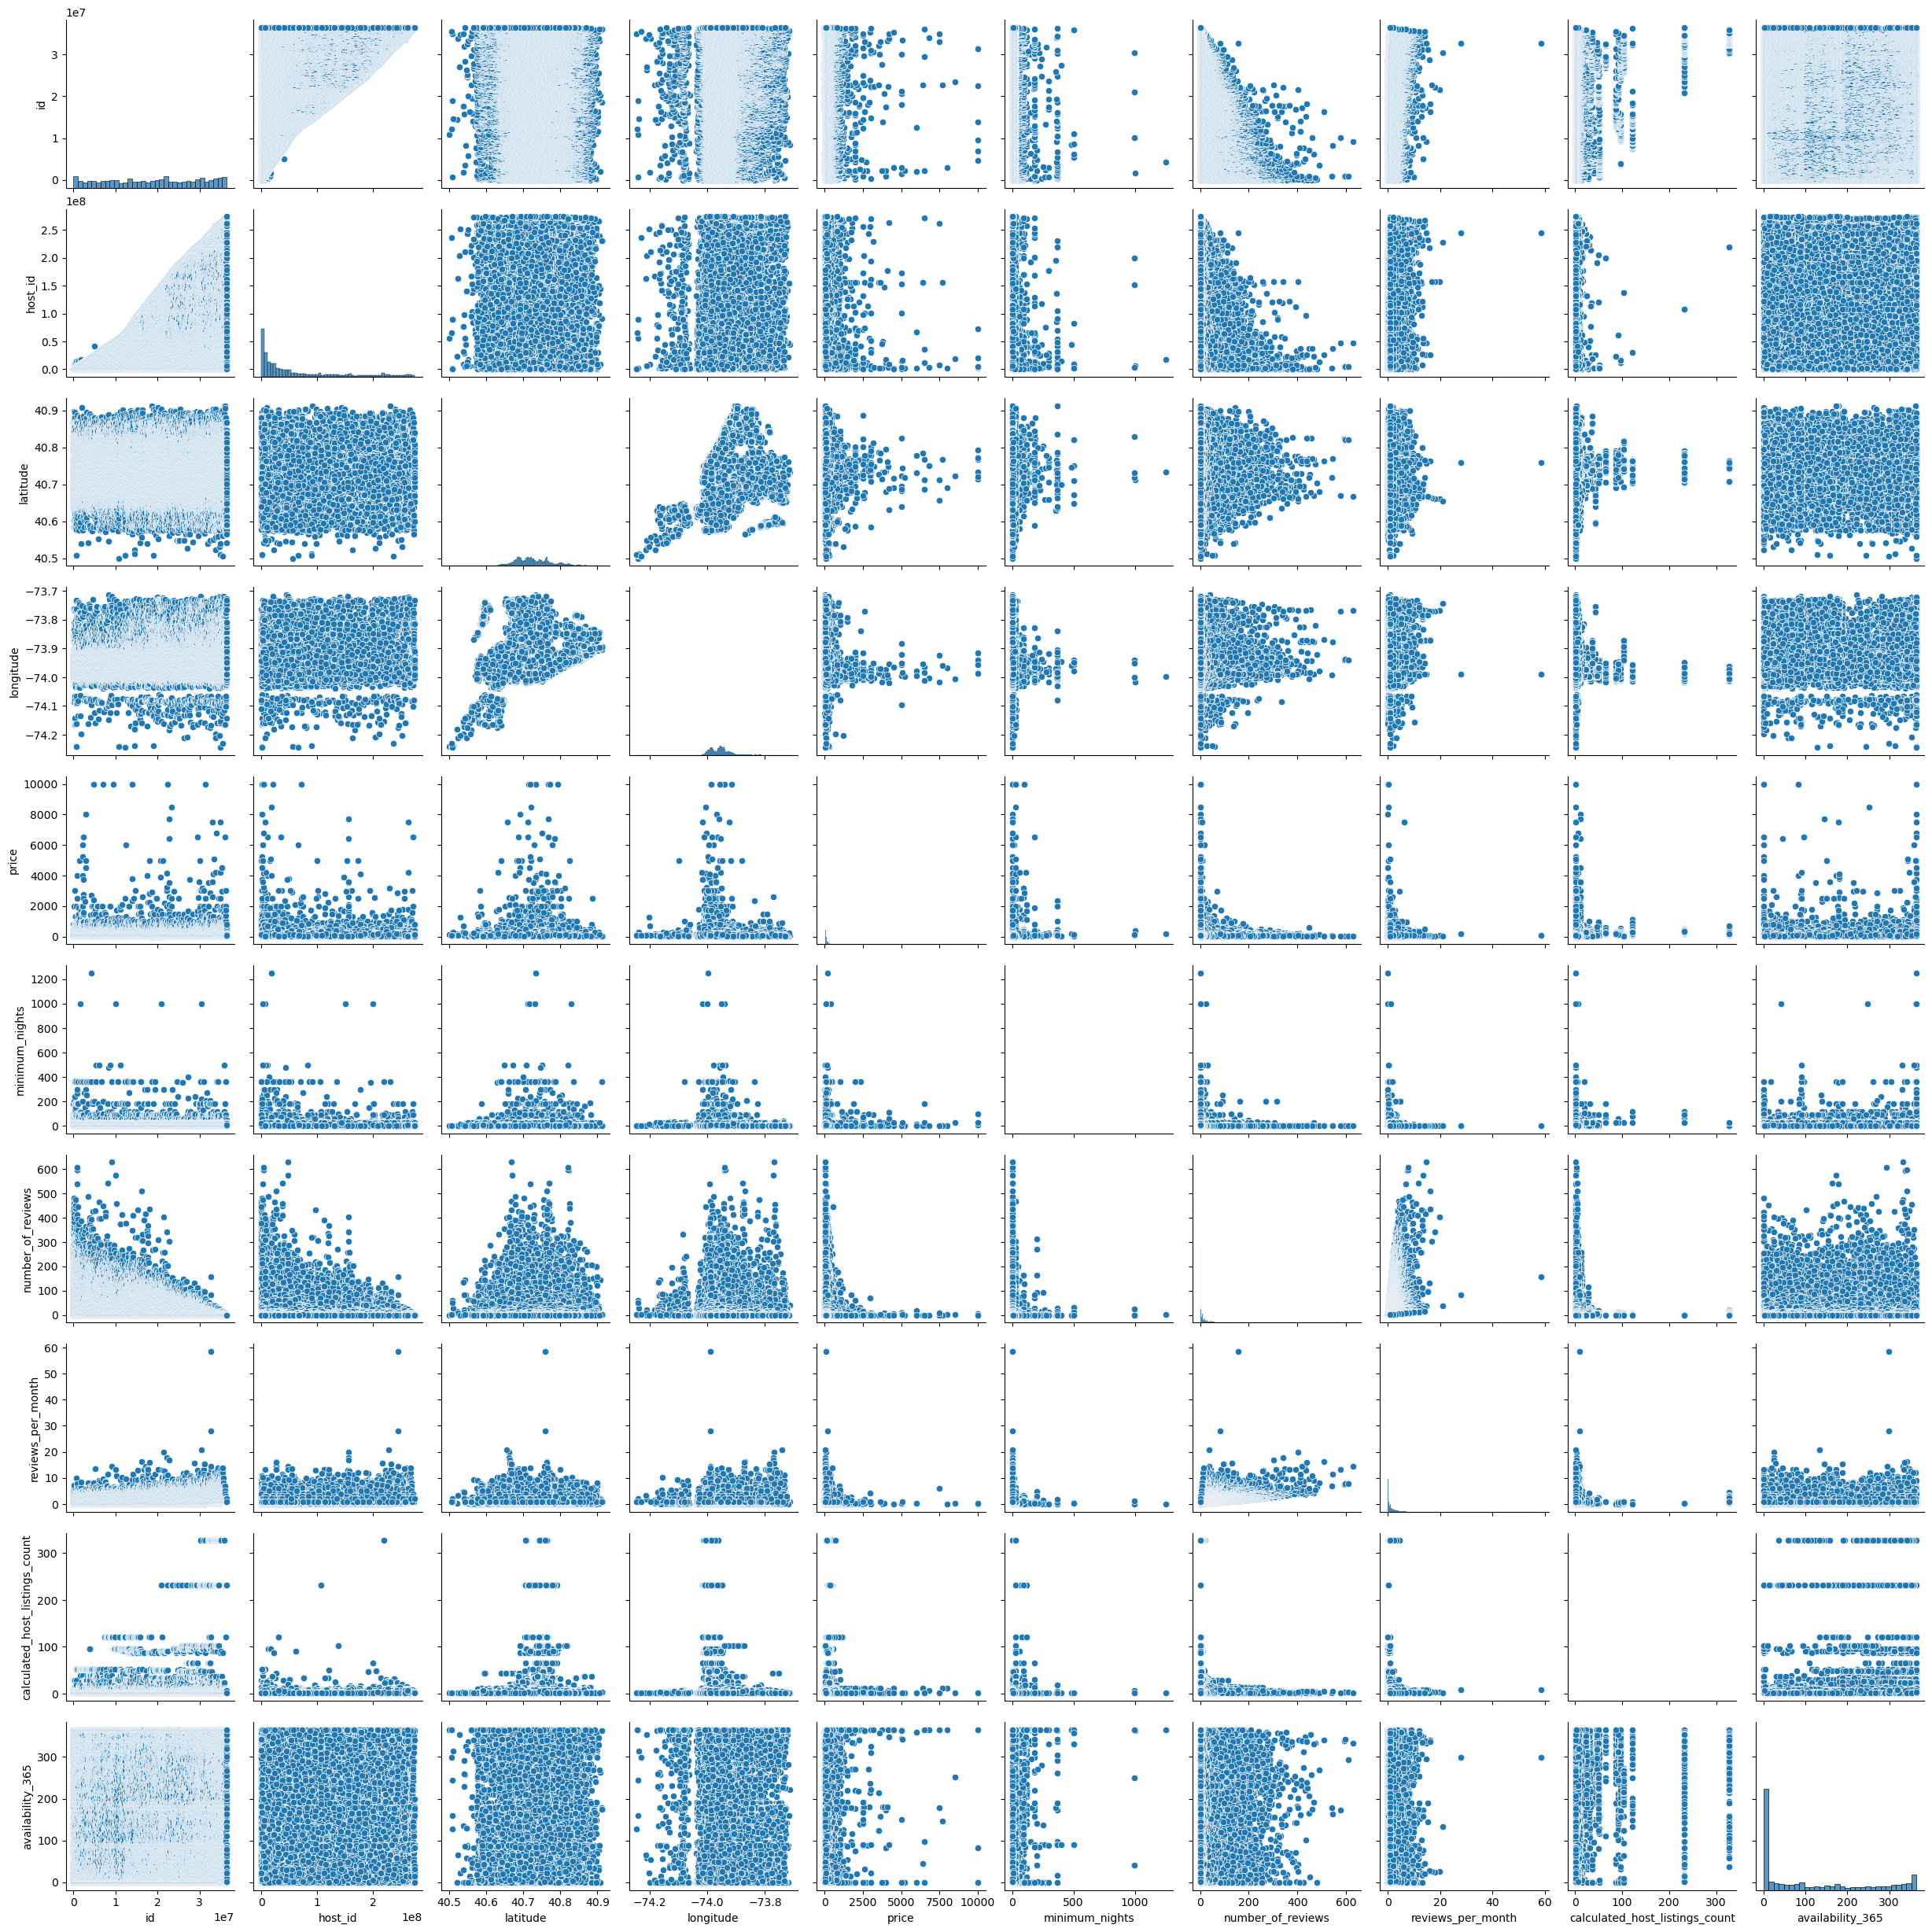

In [295]:
#### Basic plotting i visualització del dataset
sns.pairplot(df)
plt.show()

Anem  a veure la distribució de l'atribut target 

<Axes: ylabel='Density'>

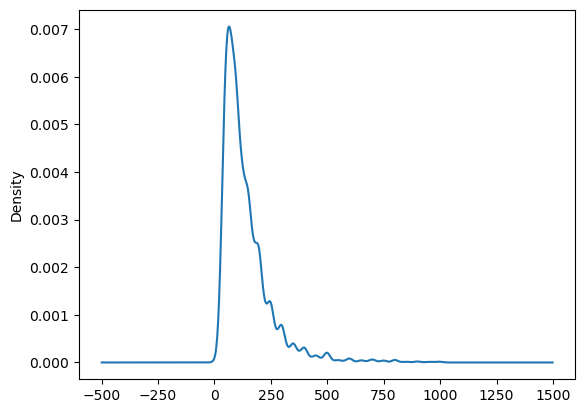

In [6]:
df[df['price'] < 1000]['price'].plot.density()

Text(0, 0.5, 'Nº AirBnb')

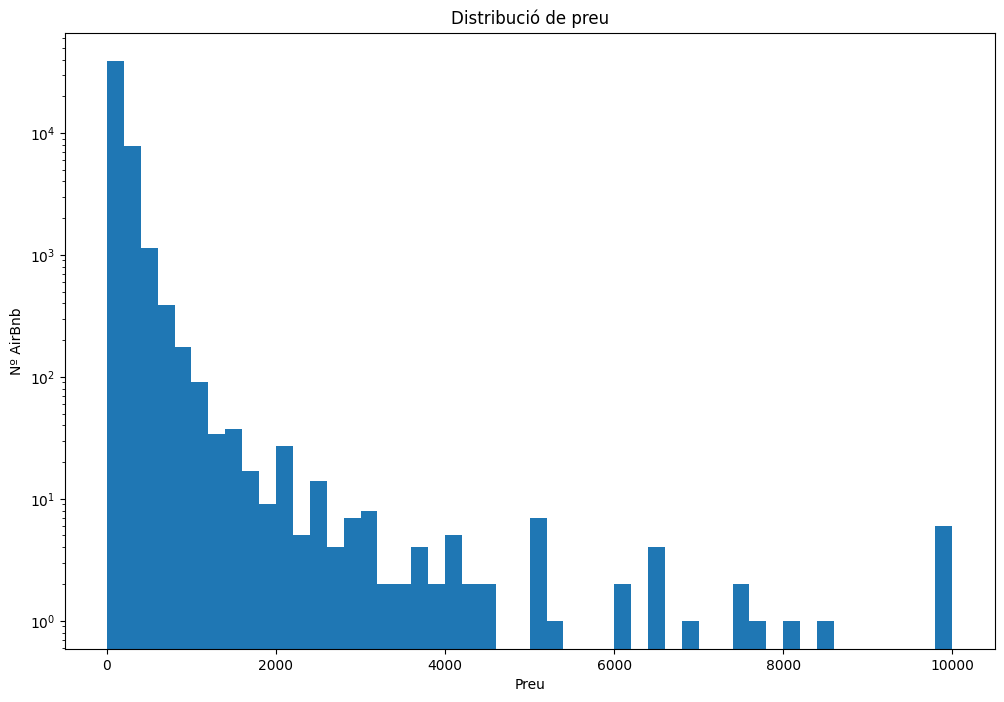

In [8]:
# Distribució del preu d'alquiler 
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df['price'], bins=50, log=True)
ax.set_title('Distribució de preu')
ax.set_xlabel('Preu')
ax.set_ylabel('Nº AirBnb')

##### Preprocessament i Data Cleaning 

##### Mirem si conté valors nuls

In [ ]:
#numero de valores nulos en el dataset 
num_valors_null = df.isnull().sum()
percentatge_null = df.isnull().sum()/df.size

#percentatge valors nuls, per entendre millor 
print(percentatge_null)

#llistem els valors nuls
columna_null = df.columns[df.isnull().any()].to_list()
print(f'Columnes amb valors nuls: {columna_null}')


id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64


[]

In [8]:
# número de valors nulls 
for valor in columna_null:
    print(df[valor].isnull().value_counts())

name
False    48876
True        16
Name: count, dtype: int64
host_name
False    48871
True        21
Name: count, dtype: int64
last_review
False    38841
True     10051
Name: count, dtype: int64
reviews_per_month
False    38841
True     10051
Name: count, dtype: int64


#### Remplaçament de valors nuls 

Les columnes 'name', 'host_name' tenen molt pocs nans. Per tant, la manera més fácil i sense afectar al model és eliminant les files que contenen els nans.  

Podem observar, que last_review i reviews_per_month estan connectats un amb l'altre. Els valors que falten representen que no s'ha deixat una ressenya per aquella anunci AirBnb. Basicament si no hi ha la data de ressenya tampoc estará el camp reviews_per_month (és un percentatge).
 - Les reviews_per_month replacarem els nans per una puntuació de 0.0, que indicarà que no hi ha ressenya.
 - La last_reviews_per_month per una data simbolica que sera l'última data possible '2019-12-31' 

In [9]:
#eliminem files amb nans 'name'
df.dropna(subset=['name'], inplace=True)

#eliminem files amb nans 'host_name'
df.dropna(subset=['host_name'], inplace=True)


C:\Users\polvi\AppData\Local\Temp\ipykernel_1448\3799080906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['name'], inplace=True)
C:\Users\polvi\AppData\Local\Temp\ipykernel_1448\3799080906.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['host_name'], inplace=True)


In [10]:
#omplim reviews_per_month
df['reviews_per_month'] = df['reviews_per_month'].fillna(0.0)

#omplim last_reviews_per_month
df['last_review'] = df['last_review'].fillna("2019-12-31")

C:\Users\polvi\AppData\Local\Temp\ipykernel_1448\3479839438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews_per_month'] = df['reviews_per_month'].fillna(0.0)
C:\Users\polvi\AppData\Local\Temp\ipykernel_1448\3479839438.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_review'] = df['last_review'].fillna("2019-12-31")


In [11]:
df.isnull().sum()/df.size

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

Podem veure com no queda cap nan.

##### Data Cleaning

Anem a eliminar els atributs que pel nostre model no són rellevants per calcular el target. També eliminant atributs redueix la possibilitat de overfitting. Els atributs a eliminar serán els seguents. 




In [242]:

df_new = df.drop(['name','id','last_review','host_name','host_id'],axis=1)
df_new.dtypes

neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Per entendre millor realitzarem unes gràfiques per tal de visualitzar els atributs i fer-nos una idea. 

Mostrem la localització dels airbnb per barris

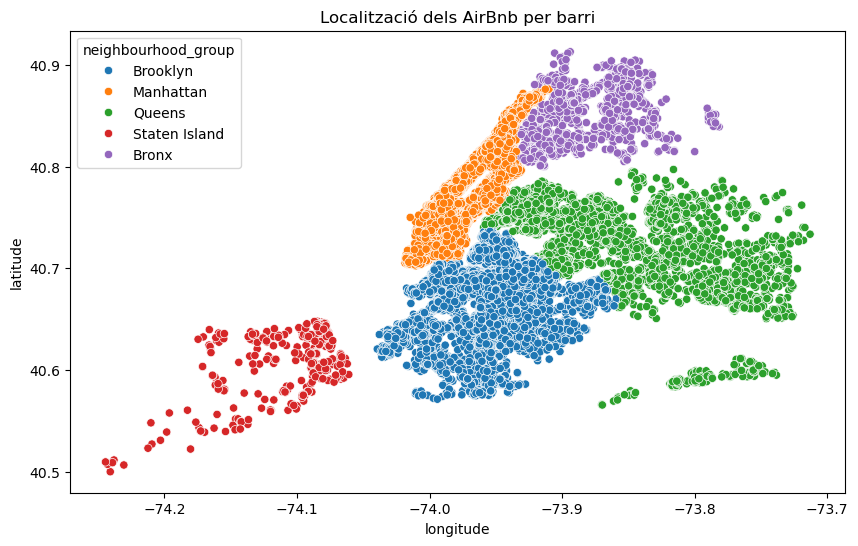

In [55]:
#farem un gràfic de punts 

title = 'Localització dels AirBnb per barri'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df).set_title(title)
plt.show()

Mirem districtes on hi ha més apartaments 


In [16]:
df.groupby(['neighbourhood_group','neighbourhood'])['neighbourhood'].count().reset_index(name='apt. count').sort_values('apt. count',ascending=False).head(10)


neighbourhood_group       neighbourhood  apt. count
93             Brooklyn        Williamsburg        3917
50             Brooklyn  Bedford-Stuyvesant        3713
105           Manhattan              Harlem        2655
58             Brooklyn            Bushwick        2461
124           Manhattan     Upper West Side        1969
106           Manhattan      Hell's Kitchen        1954
100           Manhattan        East Village        1852
123           Manhattan     Upper East Side        1797
65             Brooklyn       Crown Heights        1563
112           Manhattan             Midtown        1545

Distribució dels airbnb per barris i districtes

C:\Users\eferr\AppData\Local\Temp\ipykernel_10700\1253079244.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=neighbourhood_group,x='neighbourhood_group',y='count',ax=ax1, palette=color)
C:\Users\eferr\AppData\Local\Temp\ipykernel_10700\1253079244.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=neighbourhood.head(10),x='neighbourhood',y='count',ax=ax2, palette=color)
C:\Users\eferr\AppData\Local\Temp\ipykernel_10700\1253079244.py:12: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax2 = sns.barplot(data=neighbourhood.head(10),x='neighbourhood',y='count',ax=ax2, palette=color)
C:\

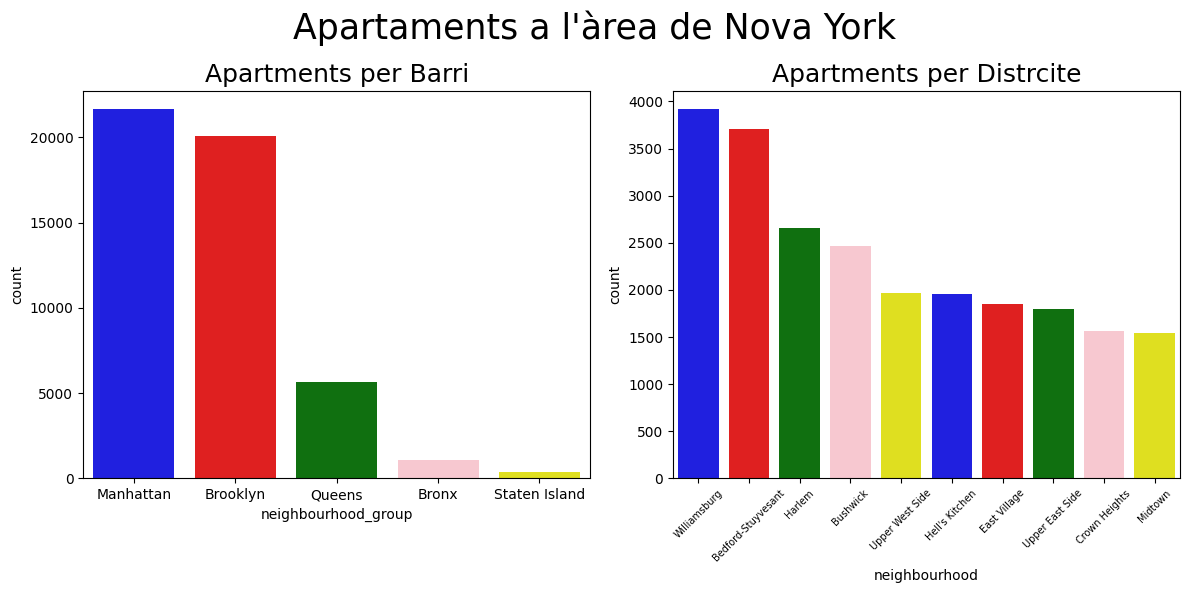

In [17]:
neighbourhood_group = df.groupby('neighbourhood_group')['neighbourhood_group'].count().reset_index(name='count').sort_values('count',ascending=False)

neighbourhood = df.groupby('neighbourhood')['neighbourhood'].count().reset_index(name='count').sort_values('count',ascending=False)

color = ['blue','red','green','pink','yellow']

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))

ax1 = sns.barplot(data=neighbourhood_group,x='neighbourhood_group',y='count',ax=ax1, palette=color)
ax1.set_title('Apartments per Barri',size=18)

ax2 = sns.barplot(data=neighbourhood.head(10),x='neighbourhood',y='count',ax=ax2, palette=color)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45,fontsize=7)
ax2.set_title('Apartments per Distrcite',size=18)

plt.suptitle("Apartaments a l'àrea de Nova York",size=25)

plt.tight_layout()

Distribució del tipus d'habitació i tipus d'habitació per barri  

C:\Users\eferr\AppData\Local\Temp\ipykernel_10700\3111150042.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=df, palette=['red','yellow','green'])


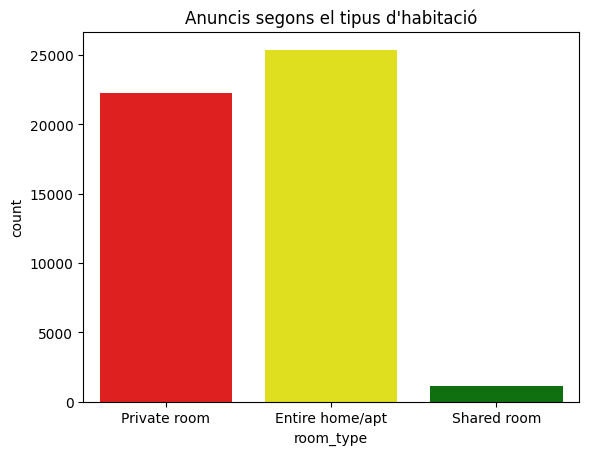

room_type
Entire home/apt    25392
Private room       22304
Shared room         1159
Name: count, dtype: int64


In [18]:
#preu dels anuncis segons tipus d'habitació 
title = "Anuncis segons el tipus d'habitació"
sns.countplot(x='room_type', data=df, palette=['red','yellow','green'])
plt.title(title)
plt.show()

print(df['room_type'].value_counts())

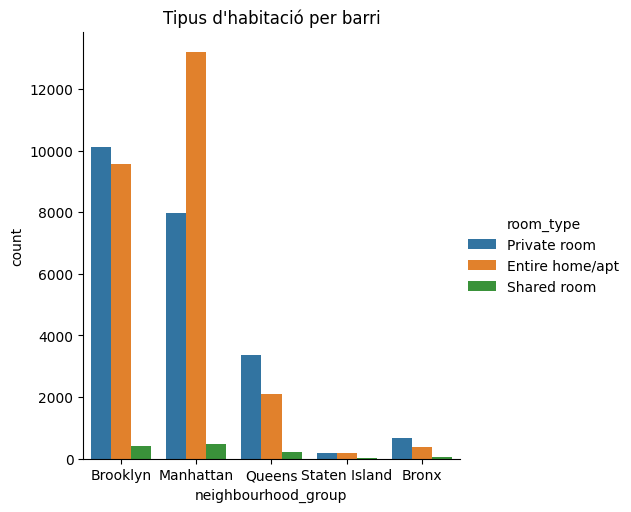

In [19]:
#classificació dels anuncis segons tipus d'habitació i barri 
title = "Tipus d'habitació per barri"
sns.catplot(x='neighbourhood_group', kind="count", hue="room_type", data=df)
plt.title(title)
plt.show()

OUTLIERS

Els outliers són valors atípics que difereixen molt de la resta i poden acabant afectant al model. Per tan, els haurem de tractar

In [243]:

num_features = list(df_new.select_dtypes(include=np.number).columns.values)

print(num_features)

['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


Anem a veure els outliers que conté el dataset per a cada atribut. 

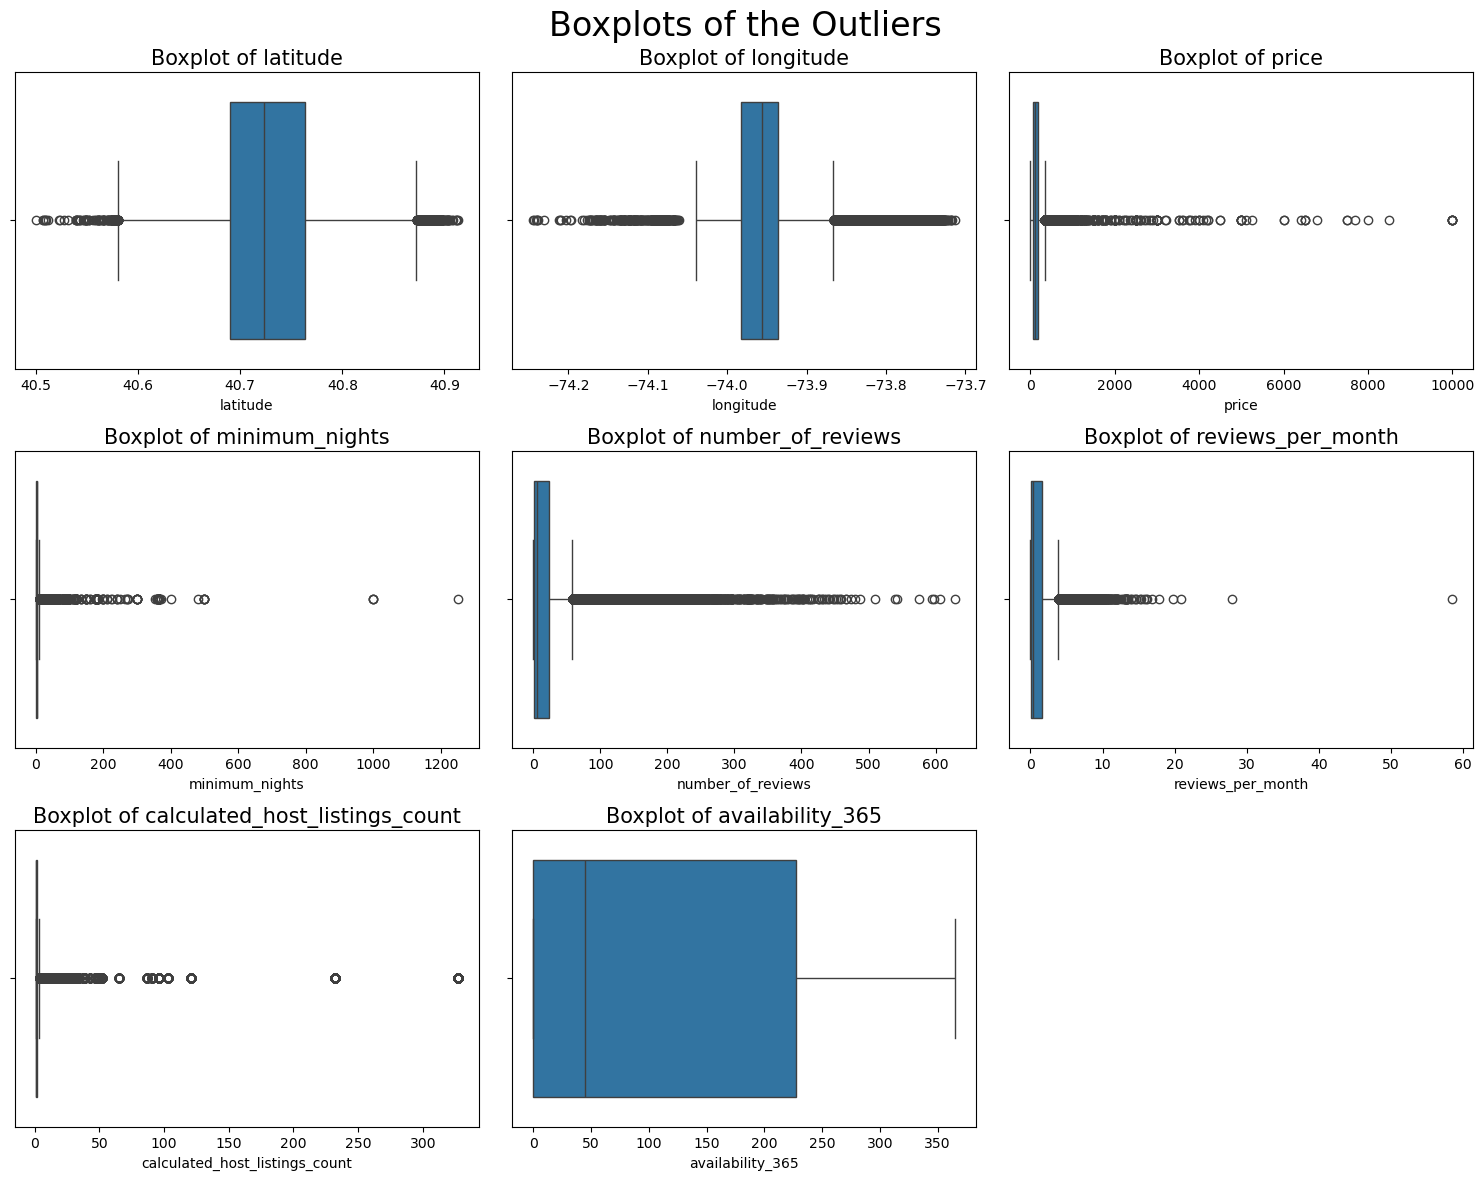

In [141]:
import math

cols = 3

# Calcula el número de filas necesarias
rows = math.ceil(len(num_features) / cols)

# Crea los subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))

# Ajusta los índices para que funcionen con subplots
axes = axes.flatten()  # Aplanar los ejes para un acceso más sencillo

for i, feature in enumerate(num_features):
    sns.boxplot(data=df_new, x=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}', fontsize=15)

# Oculta los subplots vacíos (si hay más ejes que características)
for j in range(len(num_features), len(axes)):
    fig.delaxes(axes[j])

# Título general
fig.suptitle("Boxplots of the Outliers", fontsize=24)
plt.tight_layout()
plt.show()

Anem a mirar el percentatge de outliers

In [244]:
outliers_perc = []

for k,v in df_new[num_features].items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df_new)[0]
    out_tuple = (k,int(perc))
    outliers_perc.append(out_tuple)
    print("Column %s outliers = %.2f%%" % (k,perc))

Column latitude outliers = 0.87%
Column longitude outliers = 5.80%
Column price outliers = 6.09%
Column minimum_nights outliers = 13.59%
Column number_of_reviews outliers = 12.31%
Column reviews_per_month outliers = 6.81%
Column calculated_host_listings_count outliers = 14.49%
Column availability_365 outliers = 0.00%


Els anem a tractar. 

In [245]:
def outlier_capper(data,features):
    
    data_out = data.copy()
    
    for column in features:        
        
        # First define the first and third quartiles
        Q1 = data_out[column].quantile(0.25)
        Q3 = data_out[column].quantile(0.75)
        # Define the inter-quartile range
        IQR = Q3 - Q1
        # ... and the lower/higher threshold values
        lowerL  = Q1 - 1.5 * IQR
        higherL = Q3 + 1.5 * IQR
        
        # Impute 'left' outliers
        data_out.loc[data_out[column] < lowerL,column] = lowerL
        # Impute 'right' outliers
        data_out.loc[data_out[column] > higherL,column] = higherL
        
    return data_out
    

df_new = outlier_capper(df_new,num_features)

C:\Users\polvi\AppData\Local\Temp\ipykernel_1448\3100309497.py:17: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-33.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\polvi\AppData\Local\Temp\ipykernel_1448\3100309497.py:17: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\polvi\AppData\Local\Temp\ipykernel_1448\3100309497.py:17: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-340.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



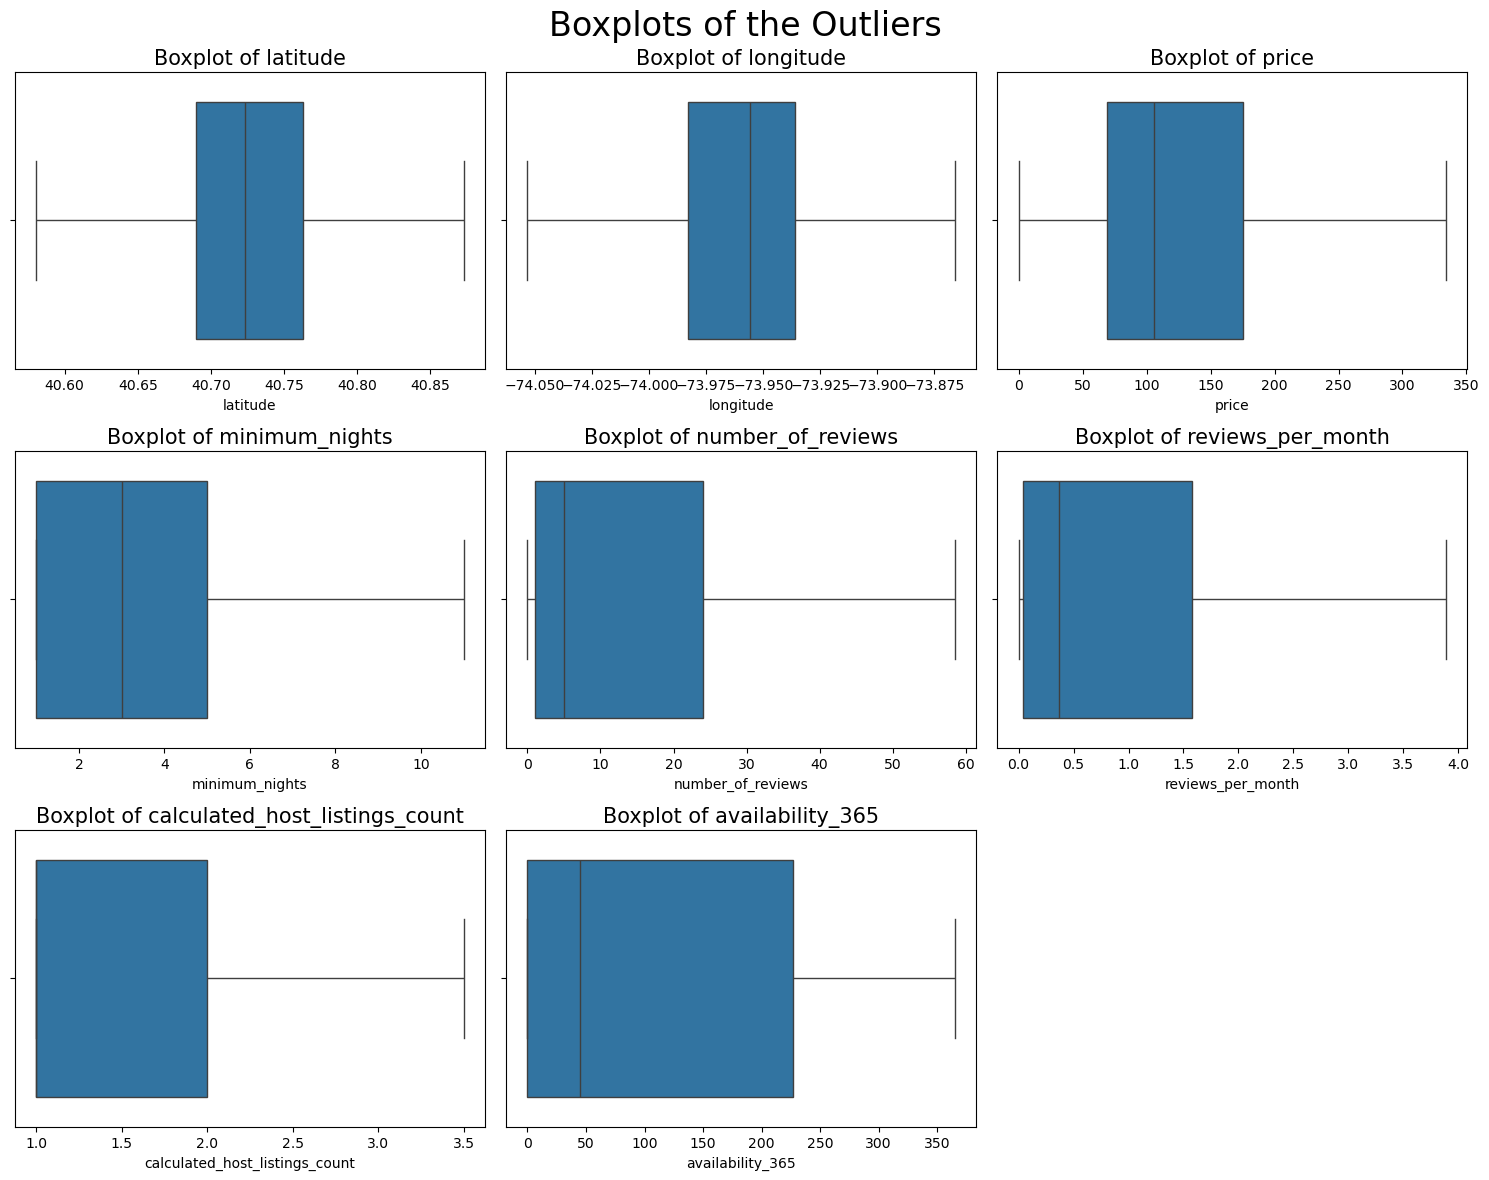

In [246]:
import math

cols = 3

# Calcula el número de filas necesarias
rows = math.ceil(len(num_features) / cols)

# Crea los subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))

# Ajusta los índices para que funcionen con subplots
axes = axes.flatten()  # Aplanar los ejes para un acceso más sencillo

for i, feature in enumerate(num_features):
    sns.boxplot(data=df_new, x=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}', fontsize=15)

# Oculta los subplots vacíos (si hay más ejes que características)
for j in range(len(num_features), len(axes)):
    fig.delaxes(axes[j])

# Título general
fig.suptitle("Boxplots of the Outliers", fontsize=24)
plt.tight_layout()
plt.show()

##### Encoding de les dades

Ara transformarem els atributs objectes en atributs numèrics ja que el l'entrenament del model només accepta atributs numèrics. Farem un label encoder dels atributs neighbourhood, neighbourhood_group
                    

In [247]:
from sklearn.preprocessing import LabelEncoder

#guardem els valors per després poder fer gàfiques
room_type_obj = df['room_type']

neighbourhood_obj = ['neighbourhood_group']


label_encoder = LabelEncoder()
df_new['neighbourhood_group'] = label_encoder.fit_transform(df_new['neighbourhood_group'])

label_encoder = LabelEncoder()
df_new['neighbourhood'] = label_encoder.fit_transform(df_new['neighbourhood'])

label_encoder = LabelEncoder()
df_new['room_type'] = label_encoder.fit_transform(df_new['room_type'])

print(df_new.dtypes)

neighbourhood_group                 int32
neighbourhood                       int32
latitude                          float64
longitude                         float64
room_type                           int32
price                               int64
minimum_nights                      int64
number_of_reviews                 float64
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
dtype: object


Veiem la matriu de correlació entre les variables per veure quina relació hi ha entre les variables entre elles i també amb l'atribut target.

In [248]:
df_new.corr()

neighbourhood_group  neighbourhood  latitude  \
neighbourhood_group                        1.000000       0.111263  0.286125   
neighbourhood                              0.111263       1.000000  0.235318   
latitude                                   0.286125       0.235318  1.000000   
longitude                                  0.049023      -0.126144  0.110100   
room_type                                 -0.016239      -0.071947  0.005761   
price                                      0.082210       0.133972  0.074873   
minimum_nights                             0.006515       0.052778  0.031574   
number_of_reviews                          0.000231      -0.050023 -0.025819   
reviews_per_month                          0.037023      -0.064955 -0.021854   
calculated_host_listings_count             0.071412      -0.039085 -0.000704   
availability_365                           0.080605      -0.034458 -0.011070   

                                longitude  room_type     price  \
neighbourhood_group              0.049023  -0.016239  0.082210   
neighbourhood                   -0.126144  -0.071947  0.133972   
latitude                         0.110100   0.005761  0.074873   
longitude                        1.000000   0.213131 -0.365015   
room_type                        0.213131   1.000000 -0.574417   
price                           -0.365015  -0.574417  1.000000   
minimum_nights                  -0.121268  -0.154446  0.053201   
number_of_reviews                0.081244  -0.005170 -0.066396   
reviews_per_month                0.124905   0.017401 -0.056115   
calculated_host_listings_count   0.078929   0.181661 -0.056994   
availability_365                 0.073106   0.022644  0.112661   

                                minimum_nights  number_of_reviews  \
neighbourhood_group                   0.006515           0.000231   
neighbourhood                         0.052778          -0.050023   
latitude                              0.031574          -0.025819   
longitude                            -0.121268           0.081244   
room_type                            -0.154446          -0.005170   
price                                 0.053201          -0.066396   
minimum_nights                        1.000000          -0.210447   
number_of_reviews                    -0.210447           1.000000   
reviews_per_month                    -0.300273           0.688953   
calculated_host_listings_count        0.181966           0.051977   
availability_365                      0.156748           0.190915   

                                reviews_per_month  \
neighbourhood_group                      0.037023   
neighbourhood                           -0.064955   
latitude                                -0.021854   
longitude                                0.124905   
room_type                                0.017401   
price                                   -0.056115   
minimum_nights                          -0.300273   
number_of_reviews                        0.688953   
reviews_per_month                        1.000000   
calculated_host_listings_count           0.090386   
availability_365                         0.188269   

                                calculated_host_listings_count  \
neighbourhood_group                                   0.071412   
neighbourhood                                        -0.039085   
latitude                                             -0.000704   
longitude                                             0.078929   
room_type                                             0.181661   
price                                                -0.056994   
minimum_nights                                        0.181966   
number_of_reviews                                     0.051977   
reviews_per_month                                     0.090386   
calculated_host_listings_count                        1.000000   
availability_365                                      0.413842   

                   

<Axes: >

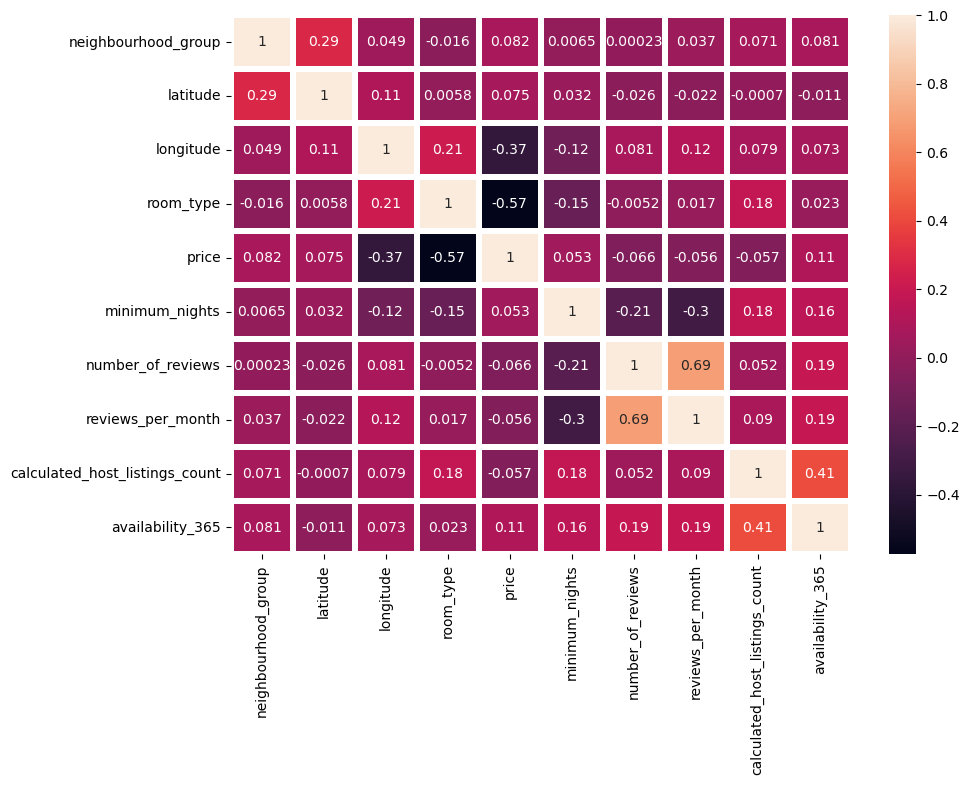

In [147]:
plt.figure(figsize=(10,7))
sns.heatmap(df_new.corr(),annot=True,linewidths=3)

In [62]:
def calcular_correlacio(data, target_column='target'):
    data_temp = data.copy()
    if data_temp[target_column].dtype == 'object':
        data_temp[target_column] = data_temp[target_column].map({'+': 1, '-': 0})
    le = LabelEncoder()
    for column in data_temp.columns:
        if data_temp[column].dtype == 'object' and column != target_column:
            data_temp[column] = le.fit_transform(data_temp[column])
    correlacions = data_temp.corr()[target_column]
    correlacions = correlacions.drop(target_column)
    return correlacions

correlacions = calcular_correlacio(df_new, target_column='price')
print(correlacions)

neighbourhood_group               0.044171
latitude                          0.033941
longitude                        -0.149953
room_type                        -0.249282
minimum_nights                    0.042795
number_of_reviews                -0.047962
reviews_per_month                -0.050603
calculated_host_listings_count    0.057455
availability_365                  0.081786
Name: price, dtype: float64


C:\Users\polvi\AppData\Local\Temp\ipykernel_1448\932308209.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacions.index, y=correlacions.values,  palette='viridis')


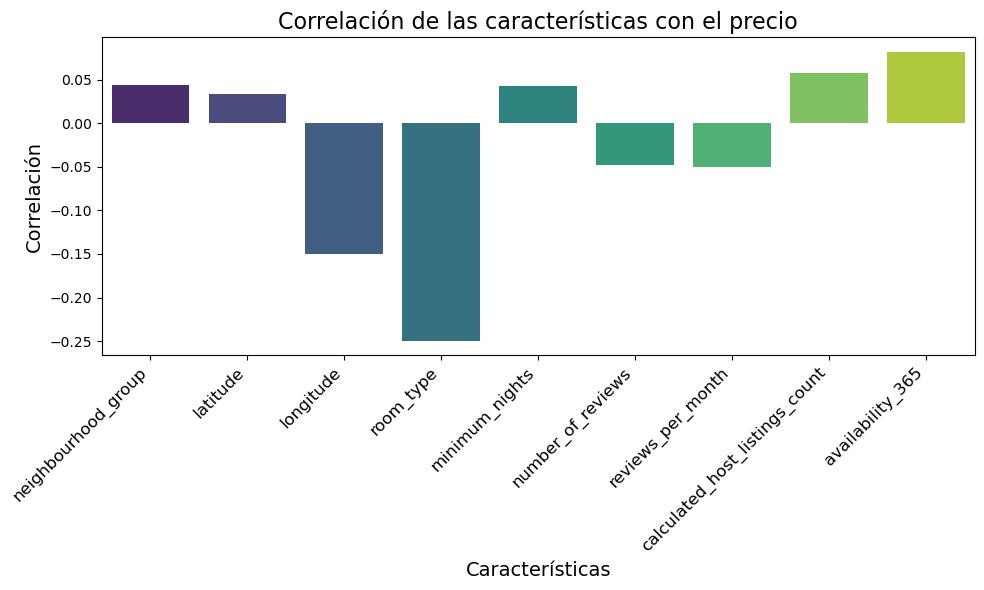

In [63]:
# Crear un gráfico de barras para visualizar las correlaciones
plt.figure(figsize=(10, 6))
sns.barplot(x=correlacions.index, y=correlacions.values,  palette='viridis')

# Añadir títulos y etiquetas
plt.title('Correlación de las características con el precio', fontsize=16)
plt.xlabel('Características', fontsize=14)
plt.ylabel('Correlación', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

CONCLUSIONS: 

### Visualització  (atributs amb el target)



Un cop vist la matriu de correlació de l'atribut target anem a analitzar el preu (que és l'atribut target) amb aquells atributs que tenen major correlació. Anem a graficar aquelles categories que estan més relacionades. 

##### Comparació de preus per els diferents barris 

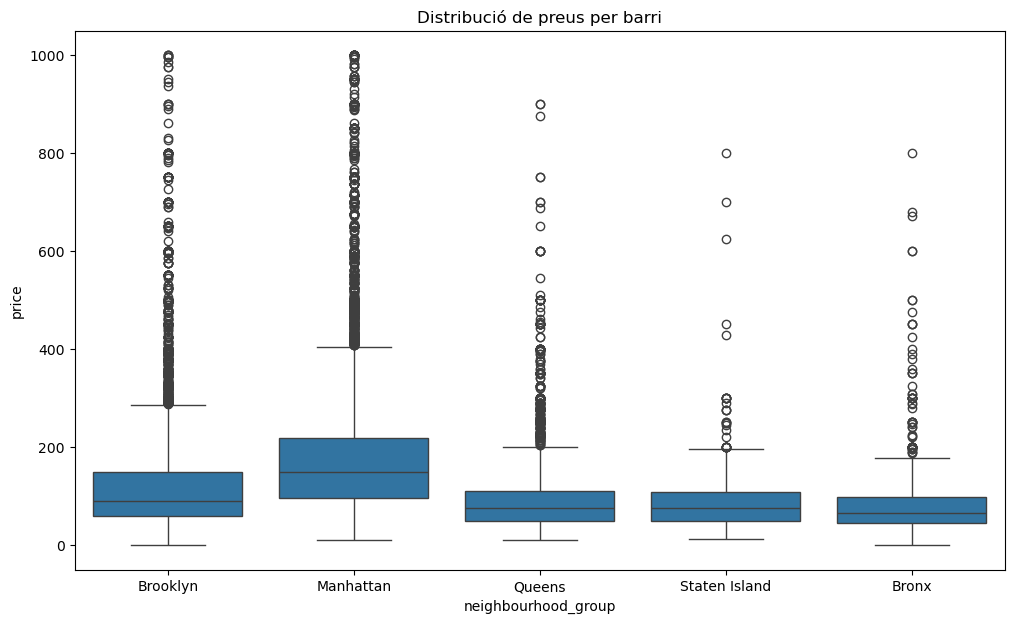

In [64]:
#fem gràfic de caixa per veure millors la distribució i també veure els valors que destaquen 
#gràfic de preu per cada barri per veure com es distribueixen

plt.figure(figsize=(12, 7))
sns.boxplot(x='neighbourhood_group', y='price', data=df[df['price'] < 1000])
plt.title("Distribució de preus per barri")
plt.show()

##### Comparació de preus per la localització 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


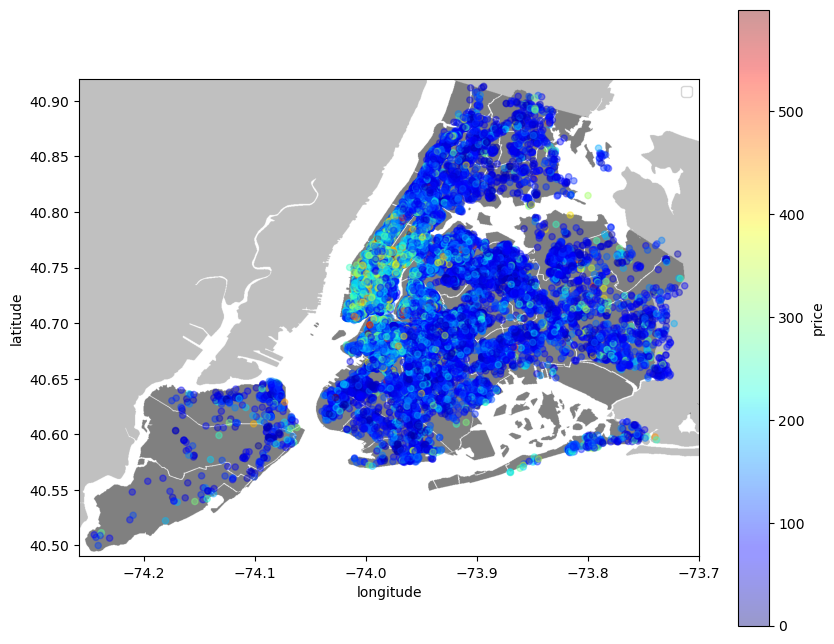

In [65]:
import urllib
from PIL import Image
import matplotlib.pyplot as plt

# Filtrar los datos
sub_6 = df[df.price < 600]

# Inicializar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Cargar la imagen desde la URL usando PIL
url = 'https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'
with urllib.request.urlopen(url) as i:
    nyc_img = Image.open(i)

# Mostrar la imagen como fondo, ajustando las coordenadas
plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])

# Obtener el eje actual
ax = plt.gca()

# Graficar el scatterplot
sub_6.plot(
    kind='scatter', 
    x='longitude', 
    y='latitude', 
    c='price', 
    ax=ax, 
    cmap=plt.get_cmap('jet'), 
    colorbar=True, 
    alpha=0.4, 
    zorder=5
)

# Mostrar la leyenda y la gráfica
plt.legend()
plt.show()

##### Comparació de preus segons tipus d'habitació 

In [296]:
num_features = df_new.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(num_features)

['longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [297]:
from sklearn.preprocessing import StandardScaler

# Inicializa el scaler
scaler = StandardScaler()

# Ajusta y transforma los datos
df_new[num_features] = scaler.fit_transform(df_new[num_features])

print(df_new.head())

   neighbourhood  longitude  room_type     price  minimum_nights  \
0            108  -0.489517          1  0.191626       -0.850977   
1            127  -0.800468          0  1.101507       -0.850977   
2             94   0.341596          1  0.203598       -0.248749   
3             41  -0.145561          0 -0.526700       -0.850977   
4             61   0.284589          0 -0.634449        1.859048   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0          -0.328032          -0.627406                        1.990397   
1           1.441202          -0.490108                        0.406429   
2          -0.770340          -0.797011                       -0.649549   
3           2.104665           2.344709                       -0.649549   
4          -0.328032          -0.716247                       -0.649549   

   availability_365  
0          1.916194  
1          1.840213  
2          1.916194  
3          0.616908  
4         -0.857137  


### ENTRENAMENT I EVALUACIÓ DEL MODEL

In [ ]:
df_new = df_new.drop(columns=['neighbourhood_group'])
X = df_new.drop(columns=["price"])
y = df_new["price"]

KeyError: "['latitude'] not found in axis"

In [278]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

Normalitzem les dades

In [276]:
from sklearn.preprocessing import StandardScaler

#scalerX = StandardScaler().fit(X_train)
#scalery = StandardScaler().fit(y_train)

#X_train = scalerX.transform(X_train)
#y_train = scalery.transform(y_train)
#X_test = scalerX.transform(X_test)
#y_test = scalery.transform(y_test)

#print (np.max(X_train), np.min(X_train), np.mean(X_train), np.max(y_train), np.min(y_train), np.mean(y_train))


sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

scy = StandardScaler()

y_train = np.asarray(y_train)
y_train = y_train.reshape(-1,1)
y_train = scy.fit_transform(y_train)

y_test = np.asarray(y_test)
y_test = y_test.reshape(-1,1)
y_test = scy.fit_transform(y_test)
                                                  

#print (np.max(X_train), np.min(X_train), np.mean(X_train), np.max(y_train), np.min(y_train), np.mean(y_train))


In [279]:
from sklearn.model_selection import *

def train_and_evaluate(clf, X_train, y_train):
    
    clf.fit(X_train, y_train)
    
    print ("Coefficient of determination on training set:",clf.score(X_train, y_train))
    
    # create a k-fold croos validation iterator of k=5 folds
    cv = KFold(5, shuffle=True, random_state=33)
    scores = cross_val_score(clf, X_train, y_train, cv=cv)
    print ("Average coefficient of determination using 5-fold crossvalidation:",np.mean(scores))

In [280]:
from sklearn import linear_model

clf_sgd = linear_model.SGDRegressor(loss='squared_error', penalty=None,  random_state=42)

train_and_evaluate(clf_sgd,X_train,y_train)

print (clf_sgd.coef_)

Coefficient of determination on training set: -1.9252158226145555e+25
Average coefficient of determination using 5-fold crossvalidation: -5.552744722597631e+24
[ 3.45168114e+10  3.18529613e+09 -5.57603920e+09 -1.40918711e+09
  1.47582789e+10  9.05590989e+09  2.89662923e+09  2.24978607e+09]


Amb un model lineal només expliquem el 8% de les dades, anem a probar amb una regressió més complexa, ja que la lineal sembla no ser suficient

Regressió polinómica

In [281]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [282]:
# Crear términos polinómicos (grado 2, se puede ajustar según lo necesites)

for degree in range(2, 4):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Ajustar un modelo de regresión lineal a los datos polinómicos
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predicciones
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Evaluación del modelo
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    print(f"Degree: {degree}")
    print(f"R² en entrenamiento: {train_r2}")
    print(f"R² en prueba: {test_r2}")
    print(f"MSE en entrenamiento: {train_mse}")
    print(f"MSE en prueba: {test_mse}")
    print("\n")

'''
# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Datos reales")
plt.scatter(X_train, y_train_pred, color="red", label="Predicción (entrenamiento)")
plt.scatter(X_test, y_test_pred, color="green", label="Predicción (prueba)")
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"Regresión Polinomial (grado {degree})")
plt.legend()
plt.show()
'''

Degree: 2
R² en entrenamiento: 0.4752513600864461
R² en prueba: 0.47276987231563117
MSE en entrenamiento: 0.524338114357531
MSE en prueba: 0.5286519985455785


Degree: 3
R² en entrenamiento: 0.5125066210820415
R² en prueba: 0.49632530262792673
MSE en entrenamiento: 0.48711199919590575
MSE en prueba: 0.5050330423112507




'\n# Visualización\nplt.figure(figsize=(10, 6))\nplt.scatter(X, y, color="blue", label="Datos reales")\nplt.scatter(X_train, y_train_pred, color="red", label="Predicción (entrenamiento)")\nplt.scatter(X_test, y_test_pred, color="green", label="Predicción (prueba)")\nplt.xlabel("X")\nplt.ylabel("y")\nplt.title(f"Regresión Polinomial (grado {degree})")\nplt.legend()\nplt.show()\n'

Añadimos regularización con Ridge

In [283]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
# Modelo con regularización L2 (Ridge)
ridge_model = Ridge(alpha=1.0)  # Ajusta alpha según sea necesario
ridge_model.fit(X_train_poly, y_train)

# Evaluar
train_r2 = ridge_model.score(X_train_poly, y_train)
test_r2 = ridge_model.score(X_test_poly, y_test)
print(f"R² en entrenamiento: {train_r2}")
print(f"R² en prueba: {test_r2}")

R² en entrenamiento: 0.512506548650054
R² en prueba: 0.4963320518519385


C:\Users\polvi\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning:

Ill-conditioned matrix (rcond=1.55589e-18): result may not be accurate.



Probamos Decission Tree

In [269]:
from sklearn.tree import DecisionTreeRegressor

# Entrenamiento
dtr = DecisionTreeRegressor(min_samples_leaf=60)
dtr.fit(X_train, y_train)

# Evaluar usando los mismos conjuntos
train_r2 = dtr.score(X_train, y_train)
test_r2 = dtr.score(X_test, y_test)

print(f"R² en entrenamiento: {train_r2}")
print(f"R² en prueba: {test_r2}")


R² en entrenamiento: 0.5769979599173531
R² en prueba: 0.5237501138090471


Probamos con randomforest

In [270]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train.ravel())

# Evaluar
train_r2 = rf_model.score(X_train, y_train)
test_r2 = rf_model.score(X_test, y_test)
print(f"R² en entrenamiento: {train_r2}")
print(f"R² en prueba: {test_r2}")

C:\Users\polvi\AppData\Local\Temp\ipykernel_1448\2306169914.py:4: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



R² en entrenamiento: 0.9389257483657747
R² en prueba: 0.5584680921937826


Anem a seleccionar els millors hiperparàmetres. Ho farem per el randomforest ja que es el que millor resultat ens dona

In [230]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Inicializa el modelo Random Forest
rfr = RandomForestRegressor(random_state=42)

# Define la cuadrícula de parámetros para la búsqueda

param_grid = {'n_estimators': [100, 200, 300, 400, 500],
              'max_depth': [10, 20, 30, 40, 50],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

# Configura RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=rfr, 
    param_distributions=param_grid,
    n_iter=10,  # Número de combinaciones a probar
    cv=3,       # Número de divisiones para validación cruzada
    verbose=2,  # Nivel de detalle en la salida
    random_state=42,
    n_jobs=-1   # Usa todos los núcleos disponibles
)

# Ajusta el modelo a los datos
rf_random.fit(X_train, y_train)

# Imprime los mejores parámetros encontrados
print(f"Mejores parámetros encontrados: {rf_random.best_params_}")
print(f"Mejor puntaje obtenido: {rf_random.best_score_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\polvi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\polvi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\polvi\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\polvi\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\polvi\anaconda3\Lib\site-packages\s

Mejores parámetros encontrados: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 50}
Mejor puntaje obtenido: 0.5642111531911209


In [231]:
# Best parameters selected.
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 50}

In [232]:
best_rf = rf_random.best_estimator_


In [234]:
from sklearn.preprocessing import PolynomialFeatures

# Transformar X_train y X_test de la misma manera
poly = PolynomialFeatures(degree=2)  # O el grado que hayas usado
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Usar X_train_poly para entrenar el modelo y X_test_poly para predecir
best_rf.fit(X_train_poly, y_train)
y_pred = best_rf.predict(X_test_poly)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('rf', RandomForestRegressor())
])

# Ajustar y predecir
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Calcular métricas
test_score = r2_score(y_test, y_pred)
train_score = pipeline.score(X_train, y_train)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² en prueba: {test_score}")
print(f"R² en entrenamiento: {train_score}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")

R² en prueba: 0.5694046788589964
R² en entrenamiento: 0.9382040257832904
MAE: 0.4652925605933806
MSE: 0.42453628523943143


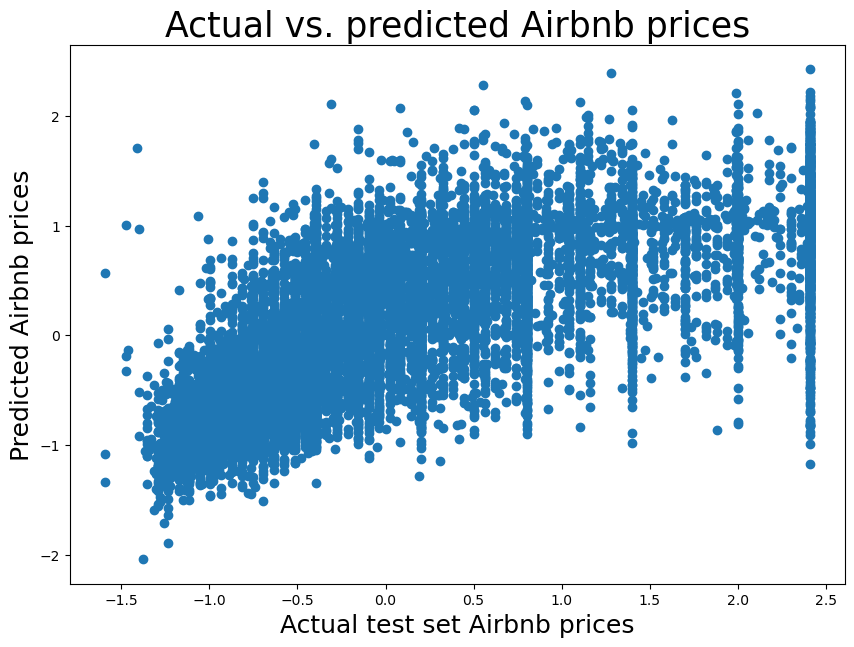

In [239]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted Airbnb prices",fontsize=25)
plt.xlabel("Actual test set Airbnb prices",fontsize=18)
plt.ylabel("Predicted Airbnb prices", fontsize=18)
plt.scatter(x=y_test,y=y_test_pred)